## Homework 3

You will have to submit the following two completed ipython notebooks for this homework.

1. PCA_analysis
2. Reconstruction

In [49]:
import numpy

In [50]:
import os

In [51]:
%pylab inline
data_dir = "../../Data/Weather/"

Populating the interactive namespace from numpy and matplotlib


In [52]:
os.listdir('../../Data/Weather/')

['data-source.txt',
 'ghcnd-readme.txt',
 'ghcnd-stations.txt',
 'ghcnd-stations_buffered.txt',
 'ghcnd-version.txt',
 'SampleStations.pickle',
 'snwd_all_stations.pickle',
 'snwd_all_years.pickle',
 'STAT.pickle',
 'stations.pkl',
 'tmax_all_stations.pickle',
 'tmax_all_years.pickle']

### Downloading Pickled data from S3
If `STAT.pickle` is not in the directory, get it using the following command

In [53]:
!curl -o $data_dir/STAT.pickle http://mas-dse-open.s3.amazonaws.com/Weather/STAT.pickle

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed

  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
  0 77.8M    0  450k    0     0   565k      0  0:02:21 --:--:--  0:02:21  565k
  4 77.8M    4 3708k    0     0  2063k      0  0:00:38  0:00:01  0:00:37 2063k
 14 77.8M   14 10.9M    0     0  3993k      0  0:00:19  0:00:02  0:00:17 3993k
 18 77.8M   18 14.5M    0     0  3935k      0  0:00:20  0:00:03  0:00:17 3935k
 27 77.8M   27 21.1M    0     0  4522k      0  0:00:17  0:00:04  0:00:13 4522k
 35 77.8M   35 27.7M    0     0  4899k      0  0:00:16  0:00:05  0:00:11 5590k
 43 77.8M   43 34.2M    0     0  5155k      0  0:00:15  0:00:06  0:00:09 6266k
 54 77.8M   54 42.1M    0     0  5533k      0  0:00:14  0:00:07  0:00:07 6395k
 64 77.8M   64 50.5M    0     0  5879k      0  0:00:13  0:00:08  0:00:05 7356k
 74 77.8M   74 57.8M    0     0  6050k      0  0:00

### Get the statistics from the Pickle File

In [54]:
import pickle
STAT,STAT_description=pickle.load(open(data_dir+'/STAT.pickle','r'))

In [55]:
STAT.keys()

['TMIN', 'TOBS', 'TMAX', 'SNOW', 'SNWD', 'PRCP']

In [56]:
print(STAT['TMIN']['mean'])

44.5310183665


In [57]:
print(len(STAT['TMIN']['SortedVals']))
print(len(STAT['TMIN']['UnDef']))

22010
6485


In [58]:
STAT_description


[('SortedVals',
  'Sample of values',
  'vector whose length varies between measurements'),
 ('UnDef',
  'sample of number of undefs per row',
  'vector whose length varies between measurements'),
 ('mean', 'mean value', ()),
 ('std', 'std', ()),
 ('low100', 'bottom 1%', ()),
 ('high100', 'top 1%', ()),
 ('low1000', 'bottom 0.1%', ()),
 ('high1000', 'top 0.1%', ()),
 ('E', 'Sum of values per day', (365,)),
 ('NE', 'count of values per day', (365,)),
 ('Mean', 'E/NE', (365,)),
 ('O', 'Sum of outer products', (365, 365)),
 ('NO', 'counts for outer products', (365, 365)),
 ('Cov', 'O/NO', (365, 365)),
 ('Var', 'The variance per day = diagonal of Cov', (365,)),
 ('eigval', 'PCA eigen-values', (365,)),
 ('eigvec', 'PCA eigen-vectors', (365, 365))]

In [59]:
Scalars=['mean','std','low1000','low100','high100','high1000']
for meas in STAT.keys():
    !grep $meas "../../Data/Weather/ghcnd-readme.txt"
    S=STAT[meas]
    for scalar in Scalars:
        print '%s:%f'%(scalar,S[scalar]),
    print

           TMIN = Minimum temperature (tenths of degrees C)
mean:44.531018 std:109.933072 low1000:-350.000000 low100:-245.000000 high100:239.000000 high1000:278.000000
 	   TOBS = Temperature at the time of observation (tenths of degrees C)
mean:113.582223 std:119.255224 low1000:-267.000000 low100:-167.000000 high100:339.000000 high1000:389.000000
           TMAX = Maximum temperature (tenths of degrees C)
mean:175.823101 std:123.742076 low1000:-233.000000 low100:-122.000000 high100:383.000000 high1000:433.000000
   	   SNOW = Snowfall (mm)
mean:2.126900 std:24.160393 low1000:0.000000 low100:0.000000 high100:76.000000 high1000:254.000000
	   SNWD = Snow depth (mm)
mean:21.454498 std:123.727039 low1000:0.000000 low100:0.000000 high100:508.000000 high1000:1676.000000
           PRCP = Precipitation (tenths of mm)
mean:24.277398 std:100.174134 low1000:0.000000 low100:0.000000 high100:356.000000 high1000:830.000000


### Script for plotting yearly plots 

In [60]:
def YearlyPlots(T,ttl='',yl='',xl='',y=None,x=None,size=(10,7)):
    yearday=[i for i in range(1,366)]
    fig=figure(1,figsize=size,dpi=300)
    if shape(T)[0] != 365:
        raise ValueError("First dimension of T should be 365. Shape(T)="+str(shape(T)))
    plot_date(yearday,T, '-');
    plt.gca().xaxis.set_major_formatter( DateFormatter('%b') )
    # rotate and align the tick labels so they look better
    #fig.autofmt_xdate()
    ylabel(yl)
    xlabel(xl)
    if y is not None:
        ylim(y)
    if x is not None:
        xlim(x)
    grid()
    title(ttl)

### Plot the following 3 plots for each measurement:

1. A histogram from the sample values (from SortedVals) restricted between low1000 and high1000
2. Plot of mean and mean $\pm$ std
3. Number of measurements recorded each day

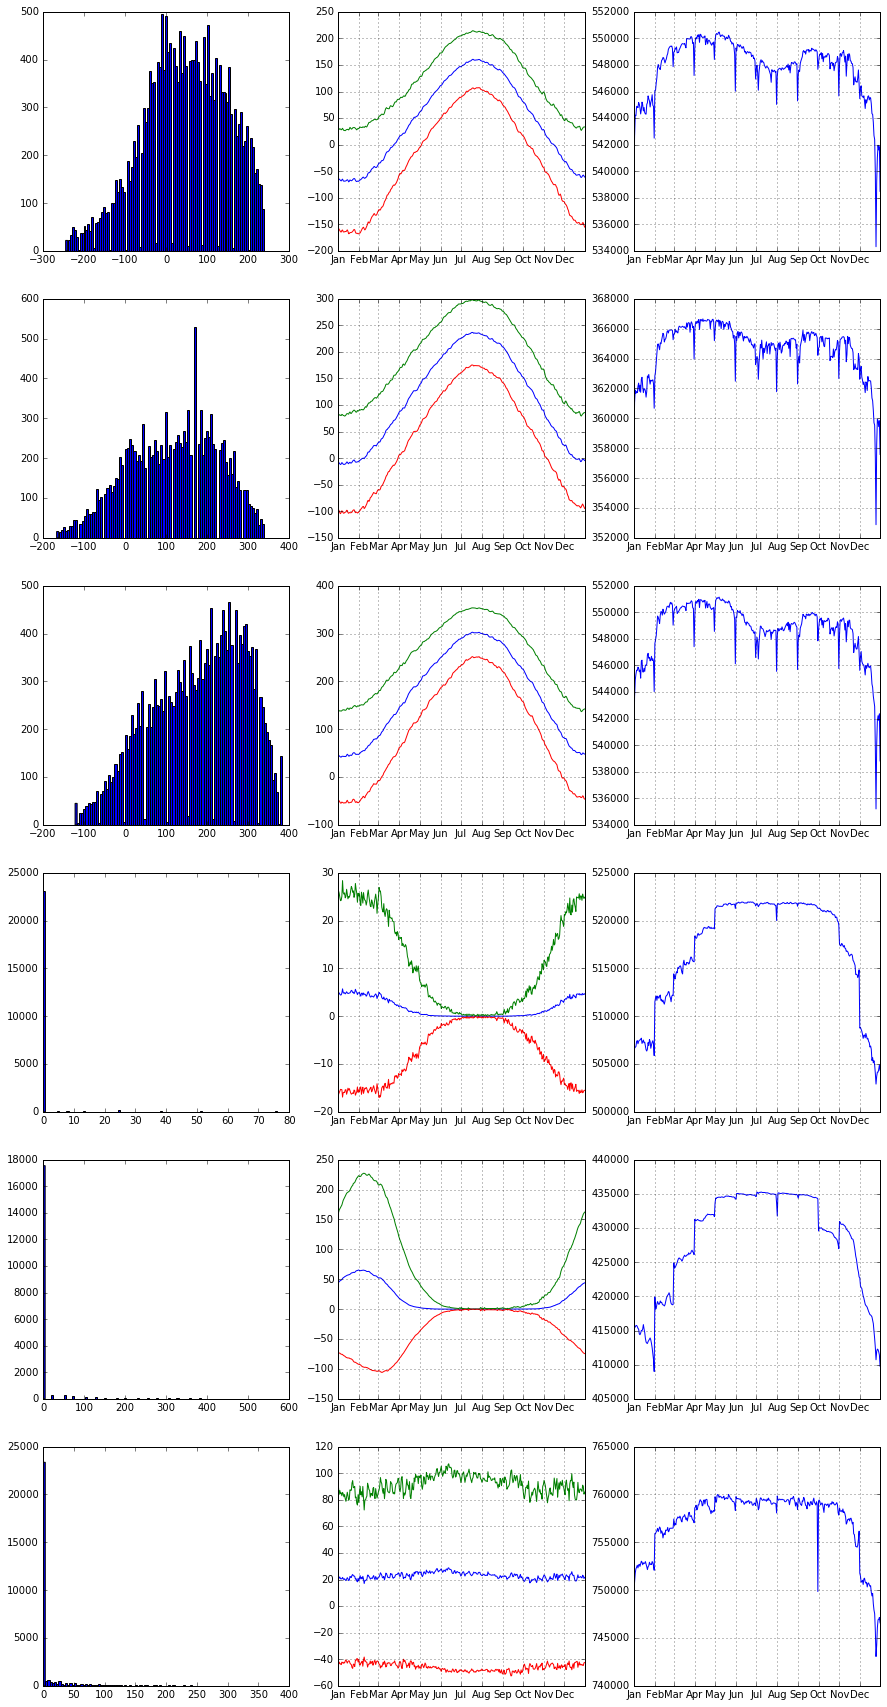

In [61]:
import numpy as np
figure(figsize=(15,30))
offset=1
for meas in STAT.keys():
    subplot(6,3,offset)
    offset+=1
    ## Your code for Histogram
    values = list(filter(lambda x: (x >= STAT[meas]['low100'] and x <= STAT[meas]['high100']), STAT[meas]['SortedVals']))
    hist(values,bins=100)
    
    subplot(6,3,offset)
    offset+=1
    ## Your code for mean and mean +- std
    YearlyPlots(STAT[meas]['Mean'])
    mean_plus_std = STAT[meas]['Mean'] + np.sqrt(STAT[meas]['Var'])
    YearlyPlots(mean_plus_std)
    mean_minus_std = STAT[meas]['Mean'] - np.sqrt(STAT[meas]['Var'])
    YearlyPlots(mean_minus_std)
    
    subplot(6,3,offset)
    offset+=1
    YearlyPlots(STAT[meas]['NE'])
    ## Your code for number of measurements

### Plot the Number of measurements recorded each day for TMAX

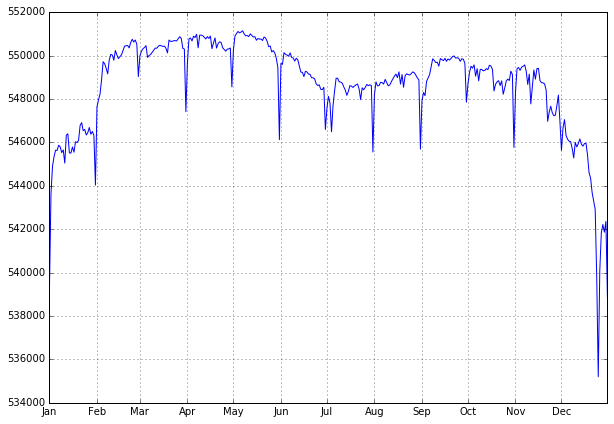

In [62]:
## Your code here
YearlyPlots(STAT['TMAX']['NE'])

### Extra Credit
* Can you figure out what is the reason for these lower counts (especially at the beginning and end of the year and also the sudden dip at the end of each month)? Is it restricted to a subset of the stations? Suggest a way to remove this effect.

* Can you Explain the counts per day for "SNWD" ?

Provide your explanation in new markdown cells appended after this cell. Support your explanation
using code cells and graphs. If you need more data that is available only in the full dataset in the cloud but not in the data you have downloaded, contact your TA.


In [63]:
'''
Can you figure out what is the reason for these lower counts (especially at the beginning and end of the year 
and also the sudden dip at the end of each month)? Is it restricted to a subset of the stations? 
Suggest a way to remove this effect.
'''

'''
Reason for Lower counts at the end of the year:
At the begining and end of the year, as there are lot of holidays, stations are closed and they donot take any measurements. 
As all thestations follow this and are closed during holidays, we can generalize this to all the stations. 

Removing this effect:
To remove this effect, we can remove the data that is collected at the begining and end of the year(especially data on holidays).

Is it restricted to a subset of the stations?
Yes it is restricted to a subset of stations.I have analyzed the data and found that most all the stations are closed 
at the end and beginning of the year. But we cannot say this to every station.

Reason for Lower counts at the end of each month:
The main reason for the dip at the end of each month is because of maintainence that happens on the station. When maintaince 
goes on in stations, obviously the station doesnt really take any measurements. But one peculiar thing that i found after 
analyzing the data for each station is that not all stations go for maintainance every month. They go for maintainance at 
the end of the month but they dont go for maintaince in every month. From the cumulative data, i found that each station goes
for maintainance for every 4-6 months and the maintainance happens at the end of the month. 

Removing the effect:
I dont think it is possible to remove this effect because we dont know the maintainance days for each station. If all the 
stations undergo maintainance at the end of each month, it would have been easier to remove the effect but thats not the case.

Is it restricted to a subset of the stations?
It is restricted to a subset of the stations. Most of the stations go for maintainance but they dont go 
for maintainance in every month. Some stations go for maintainance in jan and some go for maintainance in Feb,...dec.  
'''

    

'\nReason for Lower counts at the end of the year:\nAt the begining and end of the year, as there are lot of holidays, stations are closed and they donot take any measurements. \nAs all thestations follow this and are closed during holidays, we can generalize this to all the stations. \n\nRemoving this effect:\nTo remove this effect, we can remove the data that is collected at the begining and end of the year(especially data on holidays).\n\nIs it restricted to a subset of the stations?\nYes it is restricted to a subset of stations.I have analyzed the data and found that most all the stations are closed \nat the end and beginning of the year. But we cannot say this to every station.\n\nReason for Lower counts at the end of each month:\nThe main reason for the dip at the end of each month is because of maintainence that happens on the station. When maintaince \ngoes on in stations, obviously the station doesnt really take any measurements. But one peculiar thing that i found after \nana

In [71]:
'''
Can you Explain the counts per day for "SNWD" ?
During Summer months as there wont be any snow, it is very easy to take snow depth measurements. The SNWD measurements will
mostly be zero during summer months. The number of measurements are less during winter months because it might be difficult to 
take snow depth measurements during peak winter as the machines may not work during peak winter. Hence the number of measurements 
starts decreasing as soon as the winter starts and the number of measurements starts increasing as summer approaches.
'''

'\nCan you Explain the counts per day for "SNWD" ?\nDuring Summer months as there wont be any snow, it is very easy to take snow depth measurements. The SNWD measurements will\nmostly be zero during summer months. The number of measurements are less during winter months because it might be difficult to \ntake snow depth measurements during peak winter as the machines may not work during peak winter. Hence the number of measurements \nstarts decreasing as soon as the winter starts and the number of measurements starts increasing as summer approaches.\n'

In [65]:
import pickle
tmax_all_stations = pickle.load(open('../../Data/Weather/tmax_all_stations.pickle','r'))
tmax_all_years = pickle.load(open('../../Data/Weather/tmax_all_years.pickle','r'))
snwd_all_stations = pickle.load(open('../../Data/Weather/snwd_all_stations.pickle','r'))
snwd_all_years = pickle.load(open('../../Data/Weather/snwd_all_years.pickle','r'))

'\nFollowing are Tmax count plots for 2 stations(individual). Both of them have less counts at the end of the year. But they dont \nhave count decrease at the end of every month. Almost all the stations are closed at the end of the year.\n\n'

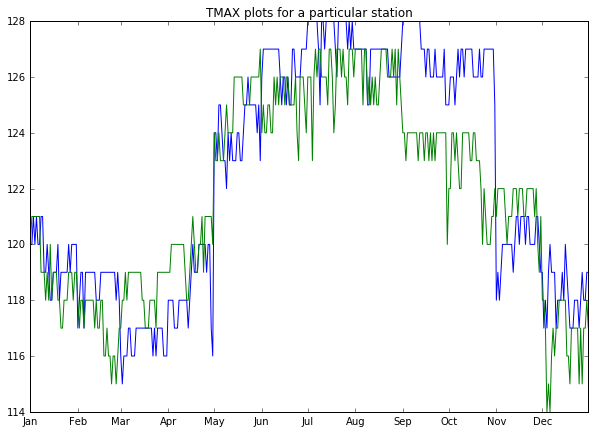

In [66]:
import numpy as np
YearlyPlots(tmax_all_stations[5155][1],ttl='TMAX plots for a particular station')
YearlyPlots(tmax_all_stations[15521][1],ttl='TMAX plots for a particular station')
'''
Following are Tmax count plots for 2 stations(individual). Both of them have less counts at the end of the year. But they dont 
have count decrease at the end of every month. Almost all the stations are closed at the end of the year.

'''

'\nFrom the following SNWD per station plots, we can say that almost all the stations are closed in the \nwinter months(i.e, december-march).\n'

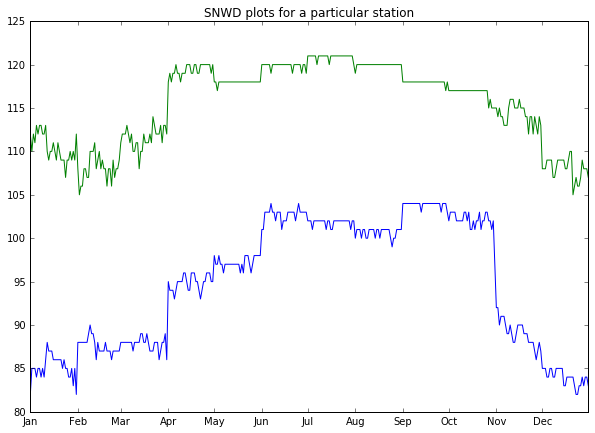

In [70]:
import numpy as np
YearlyPlots(snwd_all_stations[41][1],ttl='SNWD plots for a particular station')
YearlyPlots(snwd_all_stations[22351][1],ttl='SNWD plots for a particular station')
'''
From the following SNWD per station plots, we can say that almost all the stations are closed in the 
winter months(i.e, december-march).
'''

### Plot the following 3 plots for each measurement:

1. The percentage of variance explained by top-k eigen vectors for k between 1 to 9
2. Plot of mean and mean $\pm$ std
3. Plot of top 3 eigenvectors

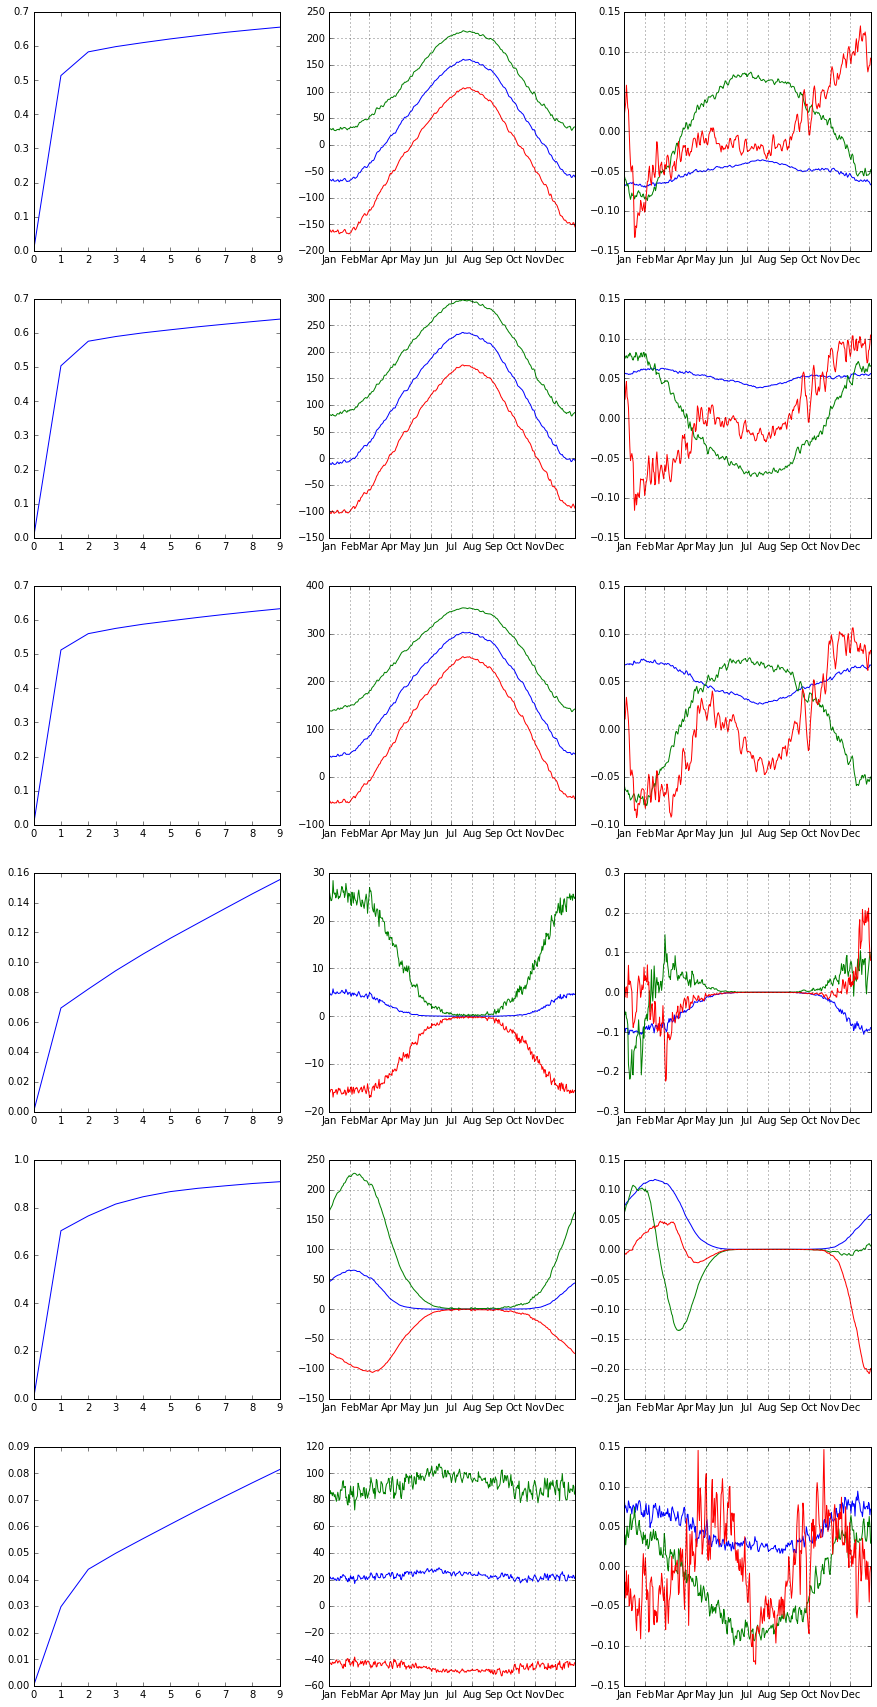

In [68]:
figure(figsize=(15,30))
offset=1
for meas in STAT.keys():
    subplot(6,3,offset)
    offset+=1
    ## Your code for percentage of variance explained
    
    variance = [0]
    sorted_values = sorted(STAT[meas]['eigval'],reverse=True)
    total = np.sum(sorted_values)
    prev = 0
    for i in range(0,9):
        variance.append(np.sum(sorted_values[:i+1]/total))
    x_val = [i for i in range(0,10)]
    #print(x_val)
    #print(variance)
    plot(x_val,variance)
    
    subplot(6,3,offset)
    offset+=1
    ## Your code for mean and mean +- std
    YearlyPlots(STAT[meas]['Mean'])
    mean_plus_std = STAT[meas]['Mean'] + np.sqrt(STAT[meas]['Var'])
    YearlyPlots(mean_plus_std)
    mean_minus_std = STAT[meas]['Mean'] - np.sqrt(STAT[meas]['Var'])
    YearlyPlots(mean_minus_std)
    
    subplot(6,3,offset)
    offset+=1
    ## Your code for top-3 eigenvectors
    for i in range(0,3):
        YearlyPlots((STAT[meas]['eigvec'].T)[i])